<strong><b><font size="6">NLP_preprocessing_Lab1</font></b></strong>

<h1>To do tasks <span class="tocSkip"></span></h1>
    <li> Lower casing
    <li> Punctuation removal
    <li> Identifying and Remove Stop Words
    <li> Tokenize Text in Words
    <li> NLTK Word Stemming
    <li> Build a bag-of-words
    <li> Create Term Frequency-Inverse Document Frequency (TF-IDF)
    <li> Bag of words
  

## Importing Libraries

In [ ]:
# ! pip install sklearn

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import string

#nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import tokenize

#sci-kit learn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


## Download and Inspect the IMDB Movie Reviews Dataset
- Labeled movie reviews data as either positive or negative reviews
- We can download the __movie_reviews__ package using the nltk.download function:

In [ ]:
nltk.download("movie_reviews")

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [ ]:
from nltk.corpus import movie_reviews

In [ ]:
len(movie_reviews.fileids())

2000

In [ ]:
movie_reviews.fileids()[:5]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt']

In [ ]:
movie_reviews.fileids()[-5:]

['pos/cv995_21821.txt',
 'pos/cv996_11592.txt',
 'pos/cv997_5046.txt',
 'pos/cv998_14111.txt',
 'pos/cv999_13106.txt']

- __fileids__ can also filter the available files based on their category, which is the name of the subfolders they are located in. Therefore we can have lists of positive and negative reviews separately.

In [ ]:
negative_fileids = movie_reviews.fileids('neg')
positive_fileids = movie_reviews.fileids('pos')

In [ ]:
len(negative_fileids), len(positive_fileids)

(1000, 1000)

- We can inspect one of the reviews using the raw method of movie_reviews, each file is split into sentences, the curators of this dataset also removed from each review from any direct mention of the rating of the movie.

In [ ]:
print(movie_reviews.raw(fileids=positive_fileids[20]))

by phil curtolo mel gibson ( braveheart ) gave a gripping performance as the father of a young kidnapped boy in ron howard's ransom . 
gibson plays tom mullen , a wealthy business tycoon whose past actions are coming back to haunt him as a deranged psychopath , played by gary sinise ( forrest gump ) , and his band of low-life thugs kidnap his only son for $2 million . 
tom and his wife , kate , played by rene russo ( tin cup ) were instructed not to inform the police , but they contacted the fbi . 
minutes later , an elite team of agents led by delroy lindo ( broken arrow ) are in tom's house and wiring every phone . 
the plot sounds average , just like most other kidnap movies that you've already seen , and it was nothing more than that . 
that is until about half-way through the movie . 
suddenly , tom goes to the fox 5 news room and makes a live broadcast saying , " this is your ransom . 
but this is as close as you will ever get to it . 
instead , i am offering this money as a rewa

In [ ]:
negative_fileids[2]

'neg/cv002_17424.txt'

In [ ]:
negative_features = pd.DataFrame(
    {'review':movie_reviews.raw(fileids=[f]),'label': 'neg'} for f in negative_fileids
)

In [ ]:
positive_features = pd.DataFrame(
    {'review':movie_reviews.raw(fileids=[f]),'label': 'pos'} for f in positive_fileids
)

In [ ]:
data = pd.concat([positive_features, negative_features], ignore_index=True)


In [ ]:
data

,review,label
0,films adapted from comic books have had plenty...,pos
1,every now and then a movie comes along from a ...,pos
2,you've got mail works alot better than it dese...,pos
3,""" jaws "" is a rare film that grabs your atten...",pos
4,moviemaking is a lot like being the general ma...,pos
...,...,...
1995,"if anything , "" stigmata "" should be taken as ...",neg
1996,"john boorman's "" zardoz "" is a goofy cinematic...",neg
1997,the kids in the hall are an acquired taste . \...,neg
1998,there was a time when john carpenter was a gre...,neg


### Lower casing

In [ ]:
data["review"]=data["review"].str.lower()

### Remove punctuation

In [ ]:
data.review[2]

"you've got mail works alot better than it deserves to . \nin order to make the film a success , all they had to do was cast two extremely popular and attractive stars , have them share the screen for about two hours and then collect the profits . \nno real acting was involved and there is not an original or inventive bone in it's body ( it's basically a complete re-shoot of the shop around the corner , only adding a few modern twists ) . \nessentially , it goes against and defies all concepts of good contemporary filmmaking . \nit's overly sentimental and at times terribly mushy , not to mention very manipulative . \nbut oh , how enjoyable that manipulation is . \nbut there must be something other than the casting and manipulation that makes the movie work as well as it does , because i absolutely hated the previous ryan/hanks teaming , sleepless in seattle . \nit couldn't have been the directing , because both films were helmed by the same woman . \ni haven't quite yet figured out wh

In [ ]:
punctuations = list(string.punctuation)
print(punctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [ ]:
st="taha;hdjhzuahuzh.()"
"".join(list(filter(lambda x:x not in punctuations,st )))

'tahahdjhzuahuzh'

In [ ]:
import re

In [ ]:
re.sub('[%s]' % re.escape(string.punctuation), '' , st)

'tahahdjhzuahuzh'

In [ ]:
### removing ponctuations
data['review']=data['review'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [ ]:
#verification
data.review[2]

'youve got mail works alot better than it deserves to  \nin order to make the film a success  all they had to do was cast two extremely popular and attractive stars  have them share the screen for about two hours and then collect the profits  \nno real acting was involved and there is not an original or inventive bone in its body  its basically a complete reshoot of the shop around the corner  only adding a few modern twists   \nessentially  it goes against and defies all concepts of good contemporary filmmaking  \nits overly sentimental and at times terribly mushy  not to mention very manipulative  \nbut oh  how enjoyable that manipulation is  \nbut there must be something other than the casting and manipulation that makes the movie work as well as it does  because i absolutely hated the previous ryanhanks teaming  sleepless in seattle  \nit couldnt have been the directing  because both films were helmed by the same woman  \ni havent quite yet figured out what i liked so much about yo

### Identifying and Remove Stop Words
- A stop word is a commonly used word (such as “the”, “a”, “an”, “in”). 
- Removal of stopwords is necessary since they add noise without having any informational value in modeling.

__Download and check stopwords from nltk:__

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop = stopwords.words('english')

In [ ]:
print('Total stop words:',len(stop))

Total stop words: 179


__Removing stopwords from reviews:__

In [ ]:
### removing stop words
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop])

data["review"]=data["review"].apply(lambda x: remove_stopwords(x))


In [ ]:
#verification
data.review[2]

'youve got mail works alot better deserves order make film success cast two extremely popular attractive stars share screen two hours collect profits real acting involved original inventive bone body basically complete reshoot shop around corner adding modern twists essentially goes defies concepts good contemporary filmmaking overly sentimental times terribly mushy mention manipulative oh enjoyable manipulation must something casting manipulation makes movie work well absolutely hated previous ryanhanks teaming sleepless seattle couldnt directing films helmed woman havent quite yet figured liked much youve got mail really important like something much even question storyline cliched come tom hanks plays joe fox insanely likeable owner discount book chain meg ryan plays kathleen kelley even insanely likeable proprietor familyrun childrens book shop called nice homage shop around corner fox kelley soon become bitter rivals new fox books store opening right across block small business li

### Tokenize Text in Words
- Tokenizing text is important since text can’t be processed without tokenization. Tokenization process means splitting bigger parts to small parts.
- You can tokenize paragraphs to sentences and tokenize sentences to words according to your needs. 
- NLTK is shipped with sentence tokenizer and word tokenizer.
- Non english text can also be tokenized by specifying the language

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

__Word Tokenizing:__

In [ ]:
data['review']=data['review'].apply(lambda x: word_tokenize(x))

In [ ]:
data

,review,label
0,"[films, adapted, comic, books, plenty, success...",pos
1,"[every, movie, comes, along, suspect, studio, ...",pos
2,"[youve, got, mail, works, alot, better, deserv...",pos
3,"[jaws, rare, film, grabs, attention, shows, si...",pos
4,"[moviemaking, lot, like, general, manager, nfl...",pos
...,...,...
1995,"[anything, stigmata, taken, warning, releasing...",neg
1996,"[john, boormans, zardoz, goofy, cinematic, deb...",neg
1997,"[kids, hall, acquired, taste, took, least, sea...",neg
1998,"[time, john, carpenter, great, horror, directo...",neg


### NLTK Word Stemming
- Word stemming means removing affixes from words and return the root word. Ex: The stem of the word working => work.
- Search engines use this technique when indexing pages, so many people write different versions for the same word and all of them are stemmed to the root word.
- There are many algorithms for stemming, but the most used algorithm is Porter stemming algorithm.
- NLTK has a class called PorterStemmer which uses Porter stemming algorithm.

In [ ]:
stemmer = PorterStemmer()
def steem_words(text):
    return [stemmer.stem(word) for word in text]

data["review"].apply(lambda text: steem_words(text))

0       [film, adapt, comic, book, plenti, success, wh...
1       [everi, movi, come, along, suspect, studio, ev...
2       [youv, got, mail, work, alot, better, deserv, ...
3       [jaw, rare, film, grab, attent, show, singl, i...
4       [moviemak, lot, like, gener, manag, nfl, team,...
                              ...                        
1995    [anyth, stigmata, taken, warn, releas, similar...
1996    [john, boorman, zardoz, goofi, cinemat, debacl...
1997    [kid, hall, acquir, tast, took, least, season,...
1998    [time, john, carpent, great, horror, director,...
1999    [two, parti, guy, bob, head, haddaway, danc, h...
Name: review, Length: 2000, dtype: object

### Lemmatizing Words Using [WordNet](https://wordnet.princeton.edu/)

__Wordnet:__
- WordNet is a lexical database for the English language.
- It groups English words into sets of synonyms called synsets, provides short definitions and usage examples, and records a number of relations among these synonym sets or their members. 
- WordNet can thus be seen as a combination of dictionary and thesaurus. While it is accessible to human users via a web browser, its primary use is in automatic text analysis and artificial intelligence applications.

__Lemmatization:__
- Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. 
- It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.
- Example: reduce words such as “am”, “are”, and “is” to a common form such as “be”

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import wordnet

In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text])
data["review"] = data["review"].apply(lambda text: lemmatize_words(text))

In [ ]:
data.to_csv("review.csv",index=True)

__Bag of Words using CountVectorizer:__


In [ ]:
corpus=data["review"]
count_vector = CountVectorizer(min_df=0.2,max_df=0.5) 
X = count_vector.fit_transform(corpus).toarray()
doc_array =  count_vector.fit_transform(corpus).toarray()
frequency_matrix = pd.DataFrame(doc_array,columns=count_vector.get_feature_names_out())
frequency_matrix

,acting,action,actor,actually,almost,along,although,always,another,anything,...,want,watch,watching,without,woman,work,world,year,yet,young
0,1,0,0,1,1,0,0,0,1,1,...,0,1,0,0,0,0,2,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,2,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,2,0,2,1,0
3,1,0,1,3,1,0,1,0,0,1,...,1,0,0,0,0,1,1,1,0,1
4,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,1,2,0,0,0,3,4,...,1,0,0,0,0,1,0,1,0,0
1996,0,0,0,0,0,0,2,0,0,2,...,0,0,0,0,0,0,3,2,0,0
1997,0,0,1,0,1,0,0,0,1,0,...,0,0,2,0,0,1,0,0,0,0
1998,0,0,1,0,0,2,0,0,0,0,...,1,0,0,1,0,3,0,0,1,0


### Term Frequency and Inverse Document Frequency
- Term Frequency measures how frequently a term occurs in a document.
- Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

        TF(t) = (Number of times term t appears in a document)

- Inverse Document Frequency measures how important a term is. While computing TF, all terms are considered equally important. 
- However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

        IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=0.2,max_df=0.5)

# Fit the vectorizer on the corpus
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get the feature names (terms)
feature_names = vectorizer.get_feature_names_out()

# Get the TF-IDF score for the first document
doc1_tfidf = tfidf_matrix[0]

# Print the feature name and corresponding TF-IDF score for the first document
# for col in doc1_tfidf.nonzero()[1]:
#     print(feature_names[col], ' : ', doc1_tfidf[0, col])
    
frequency_matrix.loc["idf",:]=doc1_tfidf.toarray()[0]


In [ ]:
frequency_matrix

,acting,action,actor,actually,almost,along,although,always,another,anything,...,want,watch,watching,without,woman,work,world,year,yet,young
0,1.000000,0.0,0.0,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,...,0.0,1.000000,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1.0,2.0,0.0
2,1.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,1.0,2.0,0.000000,2.0,1.0,0.0
3,1.000000,0.0,1.0,3.000000,1.000000,0.0,1.0,0.0,0.000000,1.000000,...,1.0,0.000000,0.0,0.0,0.0,1.0,1.000000,1.0,0.0,1.0
4,0.000000,0.0,1.0,0.000000,1.000000,0.0,0.0,1.0,0.000000,0.000000,...,0.0,0.000000,1.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,0.000000,0.0,0.0,0.000000,0.000000,0.0,2.0,0.0,0.000000,2.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,3.000000,2.0,0.0,0.0
1997,0.000000,0.0,1.0,0.000000,1.000000,0.0,0.0,0.0,1.000000,0.000000,...,0.0,0.000000,2.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0
1998,0.000000,0.0,1.0,0.000000,0.000000,2.0,0.0,0.0,0.000000,0.000000,...,1.0,0.000000,0.0,1.0,0.0,3.0,0.000000,0.0,1.0,0.0
1999,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.000000,...,1.0,0.000000,2.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0


## WordCloud

create WordCloud for movies reviews

In [ ]:
! pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(-0.5, 799.5, 599.5, -0.5)

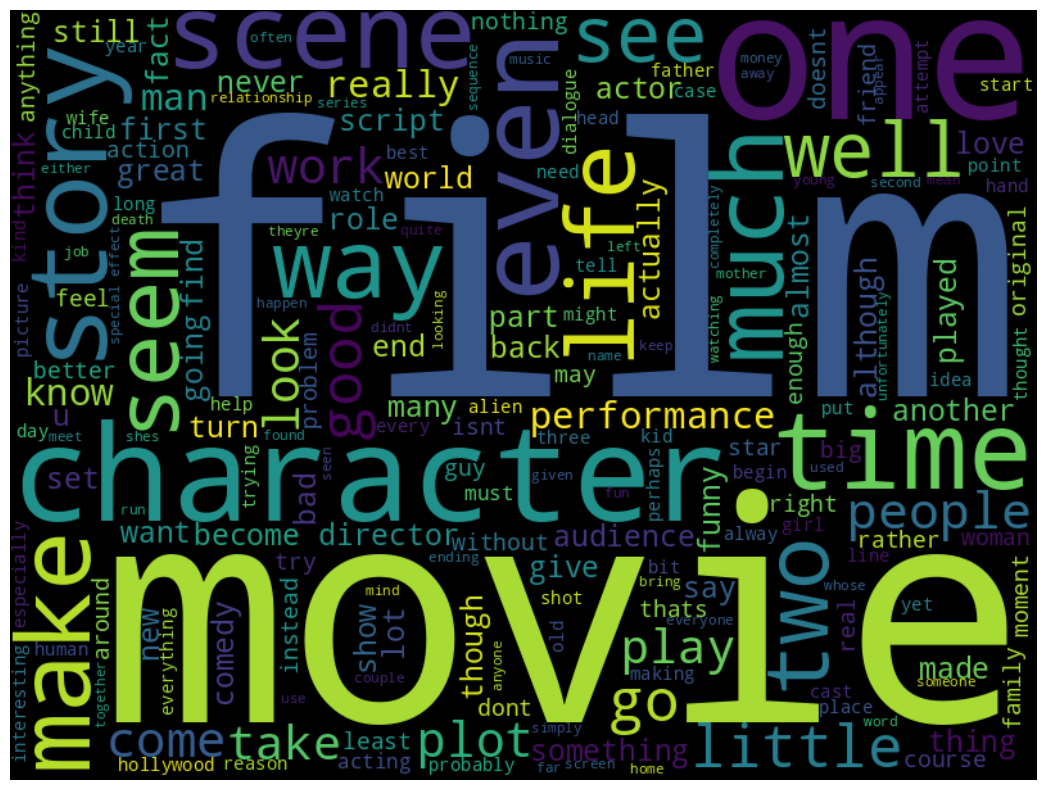

In [ ]:
import matplotlib
import pylab as plt

from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(width=800, height=600).generate(" ".join(data['review']))
plt.figure(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")